In [1]:
import MetaTrader5 as mt5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

mt5.initialize()

True

In [2]:
timezone = pytz.timezone("Africa/Nairobi")
end_date = datetime.now(timezone)
rates = mt5.copy_rates_from("EURGBPm", mt5.TIMEFRAME_D1, end_date, 1000)
print(rates[:5])

[(1611273600, 0.88607, 0.89177, 0.88593, 0.88945, 23046, 0, 0)
 (1611446400, 0.88882, 0.88917, 0.88864, 0.88882,  1151, 0, 0)
 (1611532800, 0.88896, 0.88958, 0.88678, 0.88769, 23781, 0, 0)
 (1611619200, 0.88784, 0.89041, 0.88466, 0.88495, 22686, 0, 0)
 (1611705600, 0.8851 , 0.88563, 0.88119, 0.88509, 29352, 0, 0)]


In [3]:
df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.set_index('time', inplace=True)

df = df['close']
df

time
2021-01-22    0.88945
2021-01-24    0.88882
2021-01-25    0.88769
2021-01-26    0.88495
2021-01-27    0.88509
               ...   
2024-03-31    0.85398
2024-04-01    0.85572
2024-04-02    0.85615
2024-04-03    0.85655
2024-04-04    0.85763
Name: close, Length: 1000, dtype: float64

<Axes: xlabel='time', ylabel='close'>

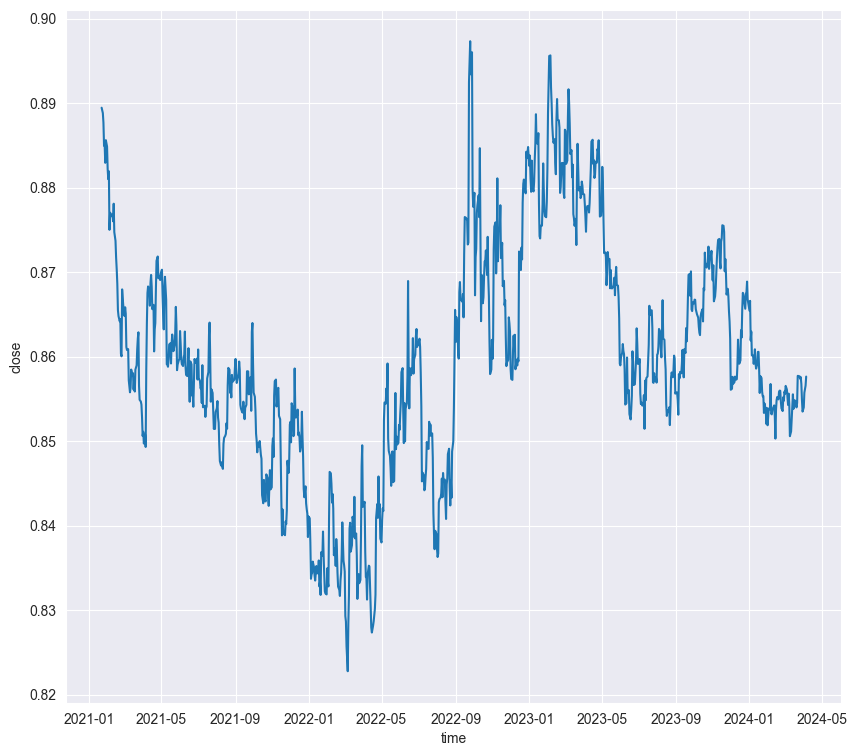

In [4]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,9))
sns.lineplot(df)